# Asymptotics
[Lecture notes](https://github.com/bcaffo/Caffo-Coursera/blob/master/lecture8.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Law of Large Numbers (LLN)
Simulating the convergance of the mean, standard deviation and variance of a Gaussian (normal) random variable sample.

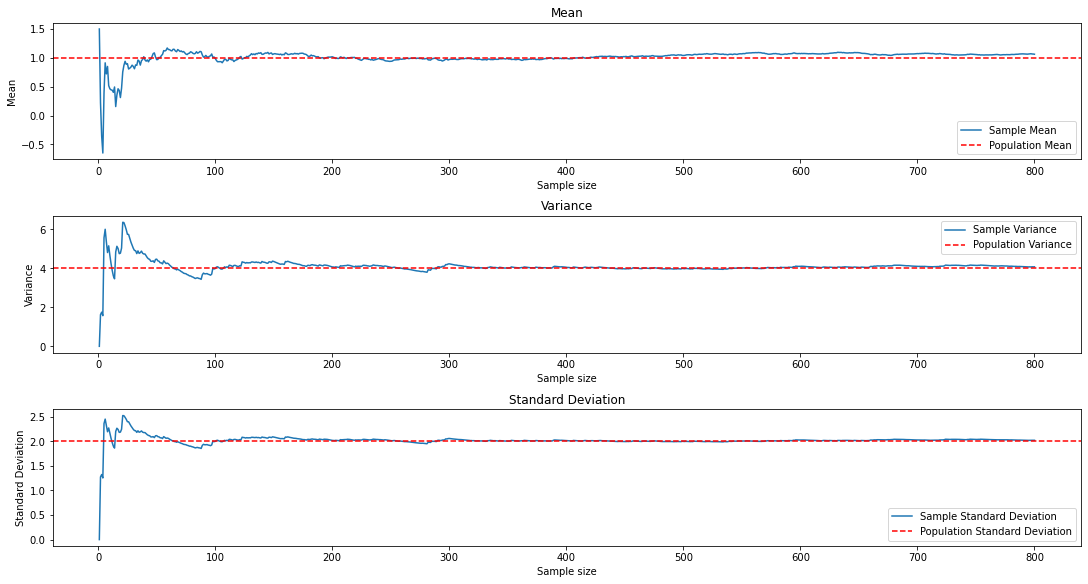

In [2]:
n = 800
mu = 1
std = 2
var = std**2

rv = norm.rvs(loc=mu, scale=std, size=n)

fun_dict = {'Mean': [mu, np.mean],
            'Variance': [var, np.var],
            'Standard Deviation': [std, np.std]}

fig, axs = plt.subplots(3, 1, figsize=(15, 8), constrained_layout=True)
x = np.arange(1, n+1)

for i, (name, vals) in enumerate(fun_dict.items()):
    fun = vals[1]
    moment = vals[0]
    
    cum_moment = [fun(rv[:i]) for i in range(1, n+1)]
    ax = axs[i]
    
    ax.plot(x, cum_moment, label=f'Sample {name}')
    ax.axhline(y=vals[0], color='red', linestyle='--', label=f'Population {name}')
    
    ax.set_title(name)
    ax.set_xlabel('Sample size')
    ax.set_ylabel(name)
    ax.legend()

plt.show()

### Note on the difference between consistency and biasedness
The following explanation is taken from Macro's answer on StackExchange [here](https://stats.stackexchange.com/questions/31036/what-is-the-difference-between-a-consistent-estimator-and-an-unbiased-estimator)

*“**An estimator is consistent** if, as the sample size increases, the estimates (produced by the estimator) "converge" to the true value of the parameter being estimated. To be slightly more precise - consistency means that, as the sample size increases, the sampling distribution of the estimator becomes increasingly concentrated at the true parameter value.*

***An estimator is unbiased*** *if, on average, it hits the true parameter value. That is, the mean of the sampling distribution of the estimator is equal to the true parameter value.*

*The two are not equivalent: Unbiasedness is a statement about the expected value of the sampling distribution of the estimator. Consistency is a statement about "where the sampling distribution of the estimator is going" as the sample size increases.”*

Read more about consistency [here](https://en.wikipedia.org/wiki/Consistent_estimator)


## Central Limit Theorem
Simulating the sample average of a number of die tosses. Note that the values have been standardized by subtracting the mean and dividing by the standard error of the sample mean.

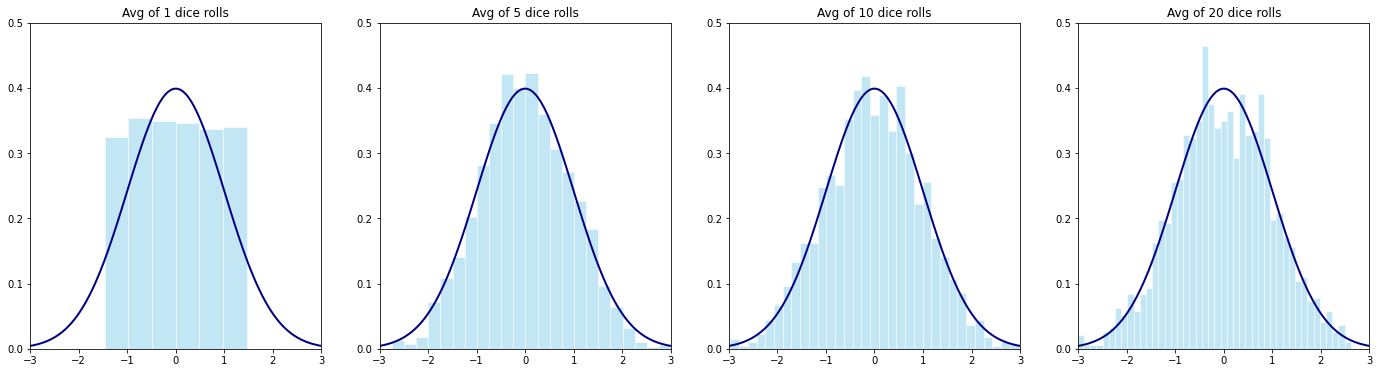

In [3]:
# Number of tosses
n_list = [1, 5, 10, 20]

# Number of trials 
n_trials = 1500

fig, axs = plt.subplots(1, len(n_list), figsize=(6*len(n_list), 6))

pop_mean = 3.5
pop_var = 2.92

for n, ax in zip(n_list, axs):
    rolls = []
    for i in range(n_trials):
        # Dice rolls
        roll = np.random.randint(1, 7, size=n)
        roll_mean = roll.mean()

        # Transforming to a standard random variable
        roll_st_error = np.sqrt(pop_var/n)
        roll_standard = (roll_mean - pop_mean) / roll_st_error
        rolls.append(roll_standard)
        
    rolls = np.array(rolls)
    # Histogram of trials
    bins = len(np.unique(rolls))
    ax.hist(rolls, bins=bins, density=True, color='skyblue',
            alpha=0.5, edgecolor='w')
    
    # Standard normal distribution
    x = np.linspace(-3, 3, 100)
    y = norm.pdf(x, loc=0, scale=1)
    ax.plot(x, y, color='navy', linewidth=2)
    
    ax.set_title('Avg of {} dice rolls'.format(n))
   
    ax.set_ylim(0, 0.5)
    ax.set_xlim(-3, 3)
    
plt.show()